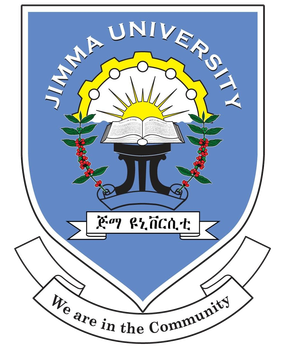

## Jimma University
#Jimma Institute of Technology

#Faculty of Electrical and Computer Engineering

4th year Mini-Project
Title :- Covid-19 Detection using X-ray

In [ ]:
import numpy as np  #it's used as array in C++ and java
import matplotlib.pyplot as plt # used to plot fig
import seaborn as sns # used to plot fig as
from mlxtend.plotting import plot_confusion_matrix  # used to draw confusion matrix
import os  # This is used to read files to indict floders in the operating system
import cv2 # cv2 is used in opencv and deeplearning foe images transform, flip, change color and so on..

from sklearn.model_selection import train_test_split # this is used in Machine learning so i used it to split the train and test file 80/20 respectively
from tensorflow.keras.utils import to_categorical #Converts a class vector (integers) to binary class matrix. 
from sklearn.preprocessing import LabelBinarizer  #Fit label binarizer and transform multi-class labels to binary labels
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling2D, Input, Dropout, Flatten, BatchNormalization
from keras.models import Sequential, Model
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from keras.applications.vgg19 import VGG19

from keras.preprocessing.image import ImageDataGenerator Image data augmentation is a technique that can be used to artificially expand the size of a training dataset by creating modified versions of images in the dataset.

A flatten layer collapses the spatial dimensions of the input into the channel dimension. For example, if the input to the layer is an H-by-W-by-C-by-N-by-S array (sequences of images), then the flattened output is an (HWC)-by-N-by-S array. This layer supports sequence input only.

In [2]:
# To get Data_.npy link use https://drive.google.com/file/d/17KYk_nSgJG8dshhgwxX-aJ8zwOUIzv-9/view?usp=sharing
# To get Labels_.npy link use https://drive.google.com/file/d/1AQeQYlGxgR3TJZY-kro2xo-YY0er-lAP/view?usp=sharing
Data = np.load("/content/drive/My Drive/Data_.npy")
Labels = np.load("/content/drive/My Drive/Labels_.npy")

In [3]:
Data =Data/255.0

In [4]:
labelb = LabelBinarizer()
Lables = labelb.fit_transform(Labels)
Labels = to_categorical(Labels, num_classes = 3) 

In [5]:
(trainX, testX, trainY, testY) = train_test_split(Data, Labels, train_size=0.8, stratify = Labels, random_state =42)

In [6]:
train_datagen = ImageDataGenerator(rotation_range = 15,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.05,
                                   shear_range = 0.2,
                                   zoom_range = 0.15,
                                   horizontal_flip = True,
                                   vertical_flip = False,
                                   fill_mode = "nearest")

In [7]:
Vgg = VGG19(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
# construct the head of the model that will be placed on top of the
# the base model
Vgg.summary()

80142336/80134624 [==============================] - 0s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [8]:
for layer in Vgg.layers:
	layer.trainable = False

Output = Vgg.output

#Outout = BatchNormalization()(Output)

Output = AveragePooling2D(pool_size=(2, 2))(Output)
Output = Flatten(name="flatten")(Output)
Output = Dense(64, activation="relu")(Output)

Final = Dense(3, activation="softmax")(Output)


model = Model(inputs=Vgg.input, outputs=Final)

AveragePooling2D class
(2, 2) will halve the input in both spatial dimension. If only one integer is specified, the same window length will be used for both dimensions. ... "same" results in padding evenly to the left/right or up/down of the input such that output has the same height/width dimension as the input.

In [9]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [10]:
ler, epoch = 0.000001, 500
Adam = Adam(lr= ler, decay=ler / epoch)

model.compile(optimizer = Adam,
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

In [ ]:
Batch_size = 32
his = model.fit_generator(
    train_datagen.flow(trainX, trainY, batch_size= Batch_size, shuffle = True),
    steps_per_epoch=len(trainX) // Batch_size,
    validation_data=(testX, testY),
    #callbacks = [lr_reduce,early_stop],
    validation_steps=len(testX) // Batch_size,
    epochs=epoch)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/500
48/48 [==============================] - 21s 447ms/step - loss: 1.8648 - accuracy: 0.3318 - val_loss: 1.8629 - val_accuracy: 0.3333
Epoch 2/500
48/48 [==============================] - 18s 381ms/step - loss: 1.7763 - accuracy: 0.3443 - val_loss: 1.7704 - val_accuracy: 0.3333
Epoch 3/500
48/48 [==============================] - 18s 385ms/step - loss: 1.6903 - accuracy: 0.3377 - val_loss: 1.6815 - val_accuracy: 0.3385
Epoch 4/500
48/48 [==============================] - 18s 385ms/step - loss: 1.6096 - accuracy: 0.3529 - val_loss: 1.5997 - val_accuracy: 0.3385
Epoch 5/500
48/48 [==============================] - 18s 383ms/step - loss: 1.5321 - accuracy: 0.3575 - val_loss: 1.5204 - val_accuracy: 0.3463
Epoch 6/500
48/48 [==============================] - 18s 382ms/step - loss: 1.4660 - accuracy: 0.3753 - val_loss: 1.4465 - val_accuracy: 0.3618
Epoch 7/500
48/48 [==============================] - 18s 382

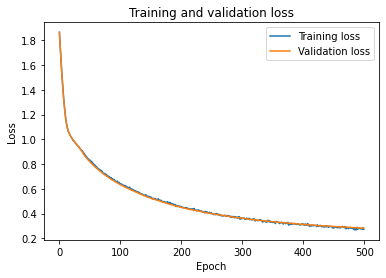

<Figure size 432x288 with 0 Axes>

In [17]:
plt.plot(his.history["loss"], label='Training loss')
plt.plot(his.history["val_loss"], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.savefig("Fmodel-2 Training and validation loss.png")

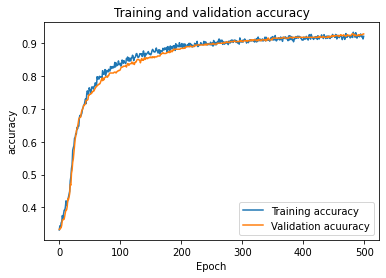

<Figure size 432x288 with 0 Axes>

In [18]:
plt.plot(his.history["accuracy"], label='Training accuracy')
plt.plot(his.history["val_accuracy"], label='Validation acuuracy')
plt.title('Training and validation accuracy')
plt.xlabel("Epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()
plt.savefig("/content/drive/My Drive/Colab Notebooks/Fmodel-2 Training and validation loss.png")

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

predict = model.predict(testX, batch_size=Batch_size)
predict = np.argmax(predict, axis=1)
print(classification_report(testY.argmax(axis=1), predict, labels=labelb.classes_))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       129
           1       0.86      0.98      0.91       129
           2       0.97      0.83      0.90       129

    accuracy                           0.93       387
   macro avg       0.93      0.93      0.93       387
weighted avg       0.93      0.93      0.93       387



(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f574c0b3f28>)

<Figure size 432x288 with 0 Axes>

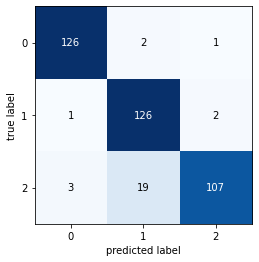

In [15]:
cm = confusion_matrix(testY.argmax(axis=1), predict, labels=labelb.classes_)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm)

In [16]:
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1] + cm[2,2]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1] + cm[0,2])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1] + cm[1,2])
specificity2 = cm[2, 2] / (cm[2, 0] + cm[2, 1] + cm[2,2])

print(cm)
print("acc: {:.4f}".format(acc)) # TOTAL ACCURACY OF THE MODEL
print("sensitivity: {:.4f}".format(sensitivity)) # ACCURACY OF COVID_19
print("specificity: {:.4f}".format(specificity)) # ACCURACY OF NORAML 
print("specificity2: {:.4f}".format(specificity2)) # ACCURACY OF PNEUMONIA

[[126   2   1]
 [  1 126   2]
 [  3  19 107]]
acc: 0.9276
sensitivity: 0.9767
specificity: 0.9767
specificity2: 0.8295


In [22]:
model.save('/content/drive/My Drive/Colab Notebooks/my_model.h5')

In [23]:
model.save_weights('/content/drive/My Drive/Colab Notebooks/my_model_weights.h5')

In [25]:
model.save('/content/drive/My Drive/Colab Notebooks/my_model')

INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/my_model/assets
